In [19]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import nibabel as nib
import numpy as np
img=nib.load('BraTS20_Training_001_flair.nii')

In [21]:
data=img.get_fdata()
data_array=data

In [22]:
print(type(data_array))

<class 'numpy.memmap'>


In [23]:
hor_cut=data_array[:,:,70]

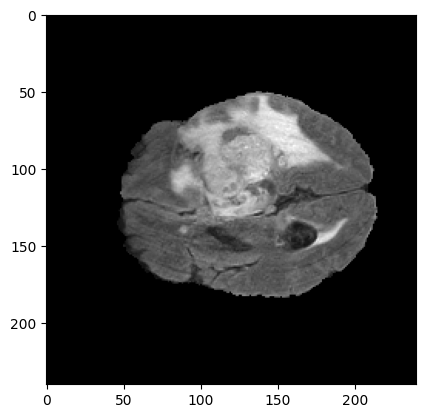

In [24]:
import matplotlib.pyplot as plt
plt.imshow(hor_cut,cmap='gray')
plt.show()

In [25]:

import cv2
def import_image(image_path):
    # Read the image using cv2.imread()
    image = cv2.imread(image_path)
    
    # Return the imported image
    return image
first_image=import_image('photos\pope_cig.jpg')
second_image=import_image('photos\pope_doodle.jpg')
third_image=import_image('photos\pope_jap.jpg')
fourth_image=import_image('photos\pope_marat.jpg')
fifth_image=import_image('photos\pope_nada.jpg')
sixth_image=import_image('photos\pope_ocean.jpg')
seventh_image = import_image('photos\pope_orange.jpg')
eighth_image = import_image('photos\pope_skull.jpg')
ninth_image = import_image('photos\pope_wall.jpg')



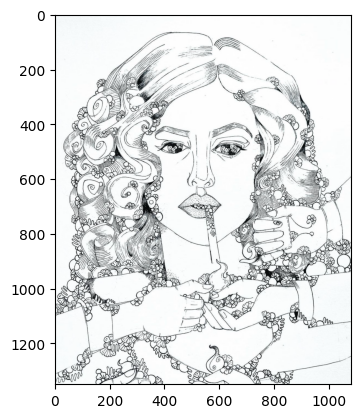

In [26]:
plt.imshow(first_image)
plt.show()

In [27]:
import cv2 


def resize_image(image, new_size):
    # Get the current dimensions of the image
    height, width = image.shape[:2]
    aspect_ratio = width / height
    if new_size[0] / new_size[1] > aspect_ratio:
        new_width = int(new_size[1] * aspect_ratio)
        new_height = new_size[1]
    else:
        new_width = new_size[0]
        new_height = int(new_size[0] / aspect_ratio)

    resized_image = cv2.resize(image, (new_width, new_height))
    
    return resized_image
resized_one=resize_image(first_image, (100, 100)) 
resized_one=cv2.cvtColor(resized_one, cv2.COLOR_BGR2GRAY)
resized_two=resize_image(second_image, (100, 100)) 
resized_two=cv2.cvtColor(resized_two, cv2.COLOR_BGR2GRAY)
resized_three=resize_image(third_image, (100, 100))
resized_three=cv2.cvtColor(resized_three, cv2.COLOR_BGR2GRAY)
resized_four=resize_image(fourth_image, (70, 70))
resized_four=cv2.cvtColor(resized_four, cv2.COLOR_BGR2GRAY)
resized_five=resize_image(fifth_image, (100, 100))
resized_five=cv2.cvtColor(resized_five, cv2.COLOR_BGR2GRAY)
resized_six=resize_image(sixth_image, (100, 100)) 
resized_six=cv2.cvtColor(resized_six, cv2.COLOR_BGR2GRAY)
resized_seven=resize_image(seventh_image, (100, 100)) 
resized_seven=cv2.cvtColor(resized_seven, cv2.COLOR_BGR2GRAY)
resized_eight=resize_image(eighth_image, (100, 100)) 
resized_eight=cv2.cvtColor(resized_eight, cv2.COLOR_BGR2GRAY)
resized_nine=resize_image(ninth_image, (100, 100)) 
resized_nine=cv2.cvtColor(resized_nine, cv2.COLOR_BGR2GRAY)





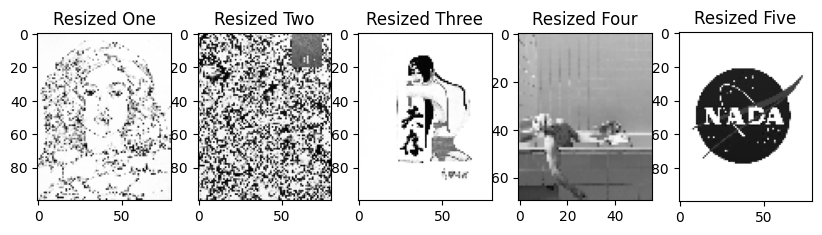

In [28]:
plt.figure(figsize=(10, 10))

# Create subplots for each resized image
plt.subplot(1, 5, 1)
plt.imshow(resized_one, cmap='gray')
plt.title('Resized One')

plt.subplot(1,5, 2)
plt.imshow(resized_two, cmap='gray')
plt.title('Resized Two')

plt.subplot(1, 5, 3)
plt.imshow(resized_three, cmap='gray')
plt.title('Resized Three')

plt.subplot(1, 5, 4)
plt.imshow(resized_four, cmap='gray')
plt.title('Resized Four')

plt.subplot(1,5, 5)
plt.imshow(resized_five, cmap='gray')
plt.title('Resized Five')

plt.show()

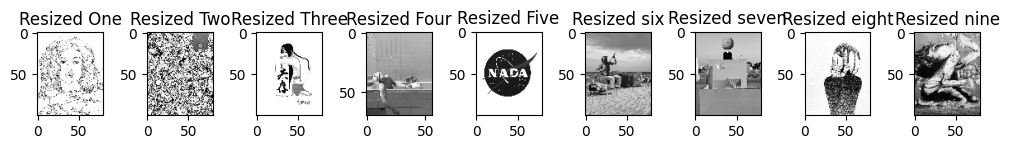

In [29]:
plt.figure(figsize=(10, 10))

# Create subplots for each resized image
plt.subplot(1, 9, 1)
plt.imshow(resized_one, cmap='gray')
plt.title('Resized One')

plt.subplot(1,9, 2)
plt.imshow(resized_two, cmap='gray')
plt.title('Resized Two')

plt.subplot(1, 9, 3)
plt.imshow(resized_three, cmap='gray')
plt.title('Resized Three')

plt.subplot(1, 9, 4)
plt.imshow(resized_four, cmap='gray')
plt.title('Resized Four')

plt.subplot(1,9, 5)
plt.imshow(resized_five, cmap='gray')
plt.title('Resized Five')
plt.subplot(1,9, 6)
plt.imshow(resized_six, cmap='gray')
plt.title('Resized six')
plt.subplot(1,9, 7)
plt.imshow(resized_seven, cmap='gray')
plt.title('Resized seven')
plt.subplot(1,9, 8)
plt.imshow(resized_eight, cmap='gray')
plt.title('Resized eight')
plt.subplot(1,9, 9)
plt.imshow(resized_nine, cmap='gray')
plt.title('Resized nine')

plt.tight_layout()
plt.show()


In [30]:
inverted_one= 255-resized_one
inverted_two= 255-resized_two
inverted_three= 255-resized_three 
inverted_four= 255-resized_four
inverted_five= 255-resized_five
inverted_six= 255-resized_six
inverted_seven= 255-resized_seven
inverted_eight= 255-resized_eight
inverted_nine= 255-resized_nine

image_list=[inverted_one,inverted_two,inverted_three,inverted_four,inverted_five,inverted_six,inverted_seven,inverted_eight,inverted_nine]


In [31]:
def image_embedder(data_array,image_list):
    height,width,time=data_array.shape
    new_data_array= np.copy(data_array)
    for t in range(time):
        rate=int(time/len(image_list))
        if t%rate==0:
            x,y=image_list[min(t//rate,len(image_list)-1)].shape
            current_img=image_list[min(t//rate,len(image_list)-1)]
        new_data_array[:x,:y,t]=new_data_array[:x,:y,t]+current_img

    return new_data_array

        

In [38]:
def image_embedder_nifty(data_array,image,n=16):
    h,w=image.shape
    _,_,time=data_array.shape
    new_data_array= np.copy(data_array)
    hs= int(h/np.sqrt(n))
    ws= int(w/np.sqrt(n))
    i=-1
    for t in range(time):
        if t%np.sqrt(n)==0:
            i+=1
        x=i%n
        y=i//n
        new_data_array[hs*x:min(hs*(x+1),h),ws*y:min(ws*(y+1),w),t]=new_data_array[hs*x:min(hs*(x+1),h),ws*y:min(ws*(y+1),w),t]+image[hs*x:min(hs*(x+1),h),ws*y:min(ws*(y+1),w)]
    return new_data_array


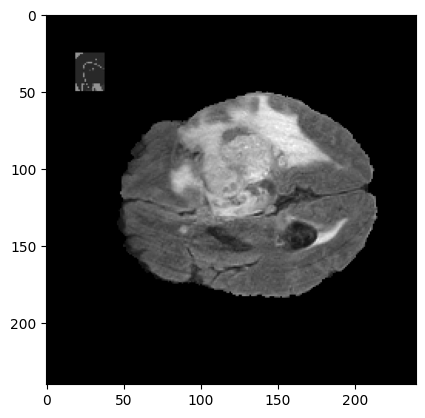

In [39]:

embedded_data_pope=image_embedder_nifty(data_array,resized_five,16)

plt.imshow(embedded_data_pope[:,:,70],cmap='gray')

In [1]:
# Determine the dimensions of the images
def video_maker(name,data_array):
    height, width,time = data_array.shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = 24  # Frames per second
    out = cv2.VideoWriter('videos/'+name+".mp4", fourcc, fps, (width, height),isColor=False)

# Write each image to the video file
    for t in range(time):
        wiw=np.uint8(data_array[:,:,t])
        out.write(wiw)
    out.release()
    print("Video created successfully!")

In [2]:
video_maker("embedding_photos_pope_nifty",embedded_data_pope)

NameError: name 'embedded_data_pope' is not defined

In [42]:
import nibabel as nib
import numpy as np

# Assuming you have modified data_array extensively

# Create a new NIfTI image from the modified data array
new_img = nib.Nifti1Image(embedded_data_pope, affine=np.eye(4))

# Save the new NIfTI image to a file
nib.save(new_img, 'new_data\embedded_data_pope_nifty.nii')